In [0]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [0]:
pip install paramiko

    100% |████████████████████████████████| 194kB 8.3MB/s 
    100% |████████████████████████████████| 2.3MB 14.3MB/s 
    100% |████████████████████████████████| 768kB 32.8MB/s 
    100% |████████████████████████████████| 61kB 30.7MB/s 
    100% |████████████████████████████████| 102kB 39.6MB/s 


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train_Madison.csv to train_Madison.csv


In [0]:
uploaded = files.upload()

Saving test_Madison.csv to test_Madison.csv


In [0]:
train = pd.read_csv("train_Madison.csv")
test = pd.read_csv("test_Madison.csv")

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

#train.head(5)
# Reviews
train_reviews = train['text']
test_reviews = test['text']
all_reviews = [train_reviews, test_reviews]
all_reviews = pd.concat(all_reviews)
# String list
text_list = [text for text in all_reviews]

# List of string to single long string
text_string = ' '.join(text_list)



# Tokenize the string into words
tokens = word_tokenize(text_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['see',
 'closing',
 'retool',
 'oppose',
 'really',
 'want',
 'see',
 'place',
 'work',
 'community']

In [0]:
words[:100]

['see',
 'closing',
 'retool',
 'oppose',
 'really',
 'want',
 'see',
 'place',
 'work',
 'community',
 'got',
 'great',
 'things',
 'going',
 'historic',
 'building',
 'street',
 'beautiful',
 'outdoor',
 'patio',
 'ample',
 'parking',
 'say',
 'visits',
 'still',
 'missing',
 'things',
 'seating',
 'guests',
 'first',
 'time',
 'went',
 'wait',
 'minutes',
 'fair',
 'place',
 'recently',
 'opened',
 'empty',
 'tables',
 'everywhere',
 'everything',
 'appeared',
 'poorly',
 'run',
 'next',
 'time',
 'made',
 'reservation',
 'still',
 'asked',
 'wait',
 'minutes',
 'table',
 'prepared',
 'following',
 'two',
 'visits',
 'great',
 'chalked',
 'early',
 'bugs',
 'working',
 'last',
 'night',
 'went',
 'seated',
 'immediately',
 'nice',
 'hostess',
 'tell',
 'wait',
 'staff',
 'sat',
 'minutes',
 'went',
 'back',
 'reminded',
 'finally',
 'got',
 'server',
 'cocktail',
 'service',
 'love',
 'good',
 'cocktail',
 'scarlet',
 'letter',
 'noteworthy',
 'got',
 'streamline',
 'well',
 'wait',

In [0]:
# Load pretrain word2vec model
from gensim import models

model = gensim.models.KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary = True) 

# Dimensions
model.vector_size

300

In [0]:
best_vec = model['korean']
best_vec[:20]

NameError: ignored

In [0]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
see,-0.055664,0.008911,-0.092285,0.214844,-0.198242,-0.036133,0.211914,-0.085449,0.107422,0.144531,...,-0.068359,-0.008667,-0.030396,0.035400,-0.086914,-0.081055,0.107910,0.003189,0.287109,-0.141602
closing,-0.113281,0.170898,0.090820,0.157227,0.116211,-0.072754,-0.083496,0.211914,0.498047,0.088379,...,-0.080566,0.142578,-0.373047,0.165039,0.150391,0.302734,0.203125,-0.000404,-0.212891,0.043213
retool,0.243164,0.431641,0.248047,0.020874,-0.300781,0.157227,-0.189453,-0.120117,0.054199,-0.176758,...,-0.294922,0.134766,-0.148438,-0.086426,-0.151367,0.028809,0.049316,-0.132812,-0.047363,-0.037354


In [0]:
len(df)

37501

In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
#train_reviews = train['text']
#test_reviews = test['text']
#all_reviews = [train_reviews, test_reviews]
#all_reviews = pd.concat(all_reviews)
x_train = train.loc[:41060,'text'].values
y_train = train.loc[:41060,'star'].values
x_test = train.loc[41061:,'text'].values
y_test = train.loc[41061:,'star'].values

all_reviews = train.loc['text'].values
tokenizer_obj = Tokenizer()
#all_reviews = x_train + x_test
tokenizer_obj.fit_on_texts()

#pad sequence
max_length = max([len(s.split()) for s in all_reviews])

#vocab size
vocab_size = len(tokenizer_obj.word_index) + 1

x_train_tokens = tokenizer_obj.texts_to_sequences(x_train)
x_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_tokens, maxlen= max_length, padding ='post')
x_test_pad = pad_sequences(x_test_tokens, maxlen= max_length, padding ='post')

In [0]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

EMBEDDING_DIM = 300
review_lines = list()
lines = train['text'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    review_lines.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
len(review_lines)

51326

In [0]:
model2 = gensim.models.Word2Vec(sentences=review_lines, size= 300, window= 20, workers=5, min_count=1)
words = list(model2.wv.vocab)
print('Vocab size : %d' % len(words))
model2.vector_size

Vocab size : 53968


300

In [0]:
model2.wv.most_similar('chinese')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('china', 0.851111650466919),
 ('asian', 0.8284125328063965),
 ('americanized', 0.8182920217514038),
 ('japanese', 0.7886996269226074),
 ('korean', 0.7719671726226807),
 ('vietnamese', 0.7647150754928589),
 ('chang', 0.7527740001678467),
 ('lo', 0.7463618516921997),
 ('mein', 0.7443437576293945),
 ('jiang', 0.7337607145309448)]

In [0]:
model2.wv.most_similar_cosmul(positive=['madison', 'party'],negative=['best'])

[('keywords', 1.2163214683532715),
 ('checkinto', 1.1692695617675781),
 ('prosperous', 1.1671671867370605),
 ('fantasies', 1.154371738433838),
 ('brightened', 1.1504309177398682),
 ('preshows', 1.1251147985458374),
 ('biomass', 1.1199023723602295),
 ('outofstaters', 1.1127111911773682),
 ('eversoslightly', 1.0978420972824097),
 ('henn', 1.0969672203063965)]

In [0]:
filename = 'yelp_embedding_word2vec.txt'
model2.wv.save_word2vec_format(filename, binary=False)

import os

embeddings_index = {}
f = open(os.path.join('', 'yelp_embedding_word2vec.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [0]:
all_reviews = train['text'].values
tokenizer_obj = Tokenizer()
#all_reviews = x_train + x_test
#tokenizer_obj.fit_on_texts()

#pad sequence
max_length = max([len(s.split()) for s in all_reviews])

In [0]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

reviews_pad = pad_sequences(sequences, maxlen = max_length)
rating = train['star'].values
print('Shape of review tensor:', reviews_pad.shape)
print('Shape of rating tensor:', rating.shape)

Found 53968 unique tokens.
Shape of review tensor: (51326, 947)
Shape of rating tensor: (51326,)


In [0]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 300))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model = Sequential()
embedding_layer = Embedding(num_words, 300,
                            input_length = max_length)

model.add(embedding_layer)
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='softmax'))

model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 947, 300)          16190700  
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 16,222,701
Trainable params: 16,222,701
Non-trainable params: 0
_________________________________________________________________


In [0]:
VAL_SPLIT = 0.1

indicies = np.arange(reviews_pad.shape[0])
np.random.shuffle(indicies)
#reviews_pad = reviews_pad[indicies]
#rating = rating[indicies]
num_validation_samples = int(VAL_SPLIT * reviews_pad.shape[0])

x_train_pad = reviews_pad[:-num_validation_samples]
y_train = rating[:-num_validation_samples]
x_test_pad = reviews_pad[-num_validation_samples:]
y_test = rating[-num_validation_samples:]

print('Shape of x_train tensor:', x_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)
print('Shape of x_test tensor:', x_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of x_train tensor: (46194, 947)
Shape of y_train tensor: (46194,)
Shape of x_test tensor: (5132, 947)
Shape of y_test tensor: (5132,)


In [0]:
print('Train..')

model.fit(x_train_pad, y_train, batch_size=128, epochs=20,
          validation_data = (x_test_pad, y_test), verbose =2)

Train..
Train on 46194 samples, validate on 5132 samples
Epoch 1/20
 - 474s - loss: nan - acc: 0.0944 - val_loss: nan - val_acc: 0.0933
Epoch 2/20
 - 474s - loss: nan - acc: 0.0944 - val_loss: nan - val_acc: 0.0933
Epoch 3/20
 - 475s - loss: nan - acc: 0.0944 - val_loss: nan - val_acc: 0.0933
Epoch 4/20


KeyboardInterrupt: ignored

In [0]:
pip install https://github.com/Phlya/adjustText/archive/master.zip

     | 3.6MB 161.8MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-suwy4aqg/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText


In [0]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(embedding_matrix[:5000])

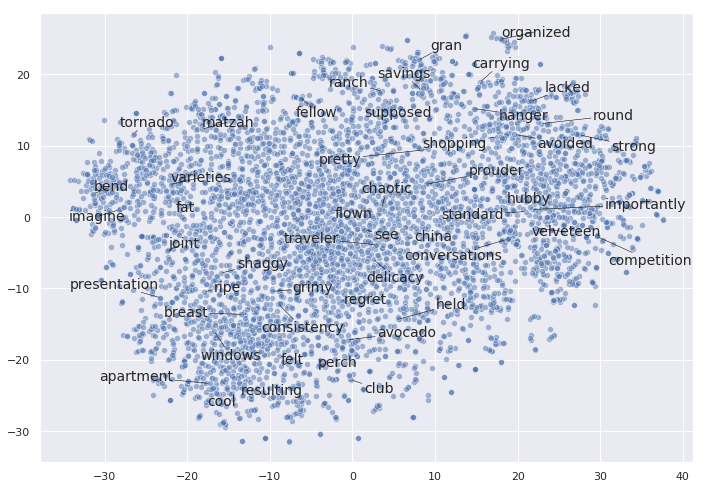

In [0]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 5000, 100))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [0]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
#train = pd.read_csv("train_Madison.csv")
#train = train[:20]
#test = pd.read_csv("test_Madison.csv")
names = train["name"]
stars = train["star"]    

In [0]:
ratingTotal = {}
ratingCount = {}
for i in range(0, len(names)):
    name = names[i]
    star = stars[i]
    if name not in ratingTotal:
        ratingTotal[name] = 0
        ratingCount[name] = 0
    ratingTotal[name] += star
    ratingCount[name]+=1
print(len(ratingTotal))
print(len(ratingCount))
ratingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount)
#Turns the predictor from rating to difference above or below mean rating for the restaurant
#for i in range(0, len(names)):
#    name = names[i]
#    diffScore = stars[i]-ratingAverage[name]
#    print(diffScore)
#    diffScores.append(diffScore)
train_city = train['city']
test_city = test['city']
city_dummies = pd.get_dummies(train_city)
city_dummies_T = pd.get_dummies(test_city)
city_dummies.head(5)
#city_dummies_T.head(5)
city_dummies.columns
name_dummies =pd.get_dummies(train['name'])
name_dummies.head(5)

1150
1150


,1847 At the Stamm House,1855 Saloon and Grill,4 Sisters Restaurant,5100 Bar & Grill,5th Quarter Sports Bar & Grill,7-Eleven,A La Brasa Mexican Grill,A&W Restaurant,A-Mart Asian Grocery,A8 China,...,Yofresh Frozen Yogurt Cafe,Yola's Cafe,Yue-Wah Oriental Foods,Yumbutter,ZenZen Taste 四合院,Ziggy's BBQ Smokehouse & Ice Cream Parlor,Zoe's Pizzeria,Zoup!,ZuZu Cafe & Market,koi sushi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
positiveCount = []
negativeCount = []
positiveOverall = []
ratingArray = []
nwords = []
posnshort = []
negnlong = []
nchars = []
avgChars = []
cityscore =[]
#negativeplus = []
#numReviews = []
#posnegratio = []
#rating > 3.7 cities
#zip : 53598, 53706, 53589, 53702, 53508, 53583, 53529, 53559, 53774, 53925
city = ['Belleville', 'Columbus', 'Dane','Marshall', 'McFarland','Paoli', 'Sauk City', 'Stoughton', 'Windsor', 'Madison', 'Verona', 'DeForest', 'Mount Horeb']
#rating <3 cities : Sun praiie, Deforest
#zip : 53527, 53590, 53719, 53713, 53597, 53718, 53531, 53515, 53701
positiveWords = ["knowledgeable", "gem", "highly", "incredible", "amazing", "die", "favorites", "wonderful", "perfect", "fantastic", "notch",
                 "favorite", "awesome", "outstanding", "yum", "delicious", "excellent", "perfectly", "loved", "helpful", "best", 
                 "savory", "cozy", "unique", "yummy", "glad", "homemade", "best", "love", "lovely", "always", "friendly", "fan",  
                 "reasonable", "beautiful", "recommended", "fashioned", "classic", "traditional", "great", "fresh", "definitely",
                 "healthy", "decent", "generous", "comfortable", "rich", "recommend", "local", "authentic", "flavorful", "highly",
                 "enjoyed", "pleased", "flavors", "super", "happy", "absolutely", "tasty", "enjoy", "fun", "reasonably", "plenty",
                 "attentive", "truly", "fancy", "wow", "must", "nicely", "every", "quick", "easily", "early", "craving", "well"]
negativeWords = ["disappointing", "weird", "issue", "none", "last", "problem", "dirty", "mediocre", "ok", "poor", "terrible",
                 "awful", "rude", "horrible", "worst", "overpriced", "needed", "barely", "sorry", "waited", "soggy", "waiting",
                 "bland", "forgot", "hope","unfortunately", "sad", "away", "bad", "loud", "overly", "greasy", "frozen", "dry",
                 "empty", "never", "less", "hard", "expensive", "tiny", "however", "wrong", "longer", "nothing", "average", 
                 "cold", "slow", "lack", "avoid", "forget", "left", "worst", "paid", "money", "minutes", "phone","asking",
                 "manager", "paying", "finally", "called", "charge", "customer", "clearly", "bill", "asked","told"]
for i in range(0, len(names)):
    #print(i)
    #print(len(names))
    posC = 0
    negC = 0
    cityC = 0
    for word in positiveWords:
        wordCount = train[word][i]
        posC+=wordCount
    for negWord in negativeWords:
        negWordCount = train[negWord][i]
        negC+=negWordCount
    nword = np.array(train["nword"])[i]
    nchar = np.array(train["nchar"])[i]
    Rnames = np.array(train["name"])[i]
    avgChars.append(nchar/nword)
    for town in city:
        if train['city'][i] == town:
            cityC = 1
            break
        else:
            continue
    nwords.append(nword)
    nchars.append(nchar)
    positiveCount.append(posC)
    negativeCount.append(negC)
    cityscore.append(cityC)
    posnshort.append(posC/nword)
    negnlong.append(negC*nword)
    if posC>negC:
        positiveOverall.append(1)
    elif posC<negC:
        positiveOverall.append(-1.5)
    else:
        positiveOverall.append(0)
    ratingArray.append(ratingAverage[names[i]])
    #numReviews.append(ratingCount[names[i]])
#predictors = np.array([positiveCount, negativeCount, ratingArray])

#predictors = np.array([nwords, positiveOverall, ratingArray, positiveCount, negativeCount, posRatio])
#posRatio = np.array(posRatio)
#print(posRatio)


# smallRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]<3)
# smallTotal = 0
# for k in smallRatingAverage:
#     smallTotal+=float(smallRatingAverage[k])
# print("Small Total: ", len(smallRatingAverage))
# print("Small Average: ", smallTotal/len(smallRatingAverage))

# largeRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]>=50)
# largeTotal = 0
# for k in largeRatingAverage:
#     largeTotal+=float(largeRatingAverage[k])
# print("Large Total: ", len(largeRatingAverage))    
# print("Large Average: ", largeTotal/len(largeRatingAverage))
#47.81 - 0.952
#49.79
#49.91

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

predictors = np.array([positiveOverall, ratingArray, positiveCount, negativeCount, posnshort, negnlong, avgChars, nwords, cityscore])
predictors = predictors.T
x_train = pd.DataFrame(predictors)
y_train = train['star']

In [0]:
reg = linear_model.LinearRegression()
model_reg = reg.fit(x_train, y_train)

acc_MLR= round(reg.score(x_train, y_train)*100,2)
print(acc_MLR)

random_forest = RandomForestClassifier()
model_rf = random_forest.fit(x_train, y_train)
acc_RF= round(random_forest.score(x_train, y_train)*100,2)
print(acc_RF)

gaussian = GaussianNB()
model_gau = gaussian.fit(x_train, y_train)
acc_NB= round(gaussian.score(x_train, y_train)*100,2)
print(acc_NB)

#linear_svc = LinearSVC()
#linear_svc.fit(predictors, train["star"])
#acc_linear_svc= round(linear_svc.score(predictors, train["star"])*100,2)
#print(acc_linear_svc)

decision_tree = DecisionTreeClassifier()
model_dt = decision_tree.fit(x_train, y_train)
acc_DT= round(decision_tree.score(x_train, y_train)*100,2)
print(acc_DT)

knn = KNeighborsClassifier()
model_knn= knn.fit(x_train, y_train)
acc_knn= round(knn.score(x_train, y_train)*100,2)
print(acc_knn)

49.87


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


98.19
45.67
99.97
59.72


In [0]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
model_rfr = rf_reg.fit(x_train, y_train)
acc_RFR = round(rf_reg.score(x_train, y_train)*100,2)
print(acc_RFR)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


90.07


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
#                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
#                                   loss='huber', random_state=5)

#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

gbm = xgb.XGBRegressor()
gbm_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
gbm_cv.fit(x_train,y_train)
print(gbm_cv.best_params_)


lgbr = lgb.LGBMRegressor()
lgbr_cv = GridSearchCV(lgbr, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
lgbr_cv.fit(x_train,y_train)
print(lgbr_cv.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.4min finished


{'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 500}


In [0]:
rf_reg_cv = GridSearchCV(rf_reg, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
rf_reg_cv.fit(x_train,y_train)
print(rf_reg_cv.best_params_)

random_forest_cv = GridSearchCV(random_forest, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
random_froest_cv.fit(x_train,y_train)
print(random_forest_cv.best_params_)

In [0]:
gbm = xgb.XGBRegressor(**gbm_cv.best_params_)
model_xgb = gbm.fit(x_train,y_train)

lgb = lgb.LGBMRegressor(**lgbr_cv.best_params_)
model_lgb = lgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
rf_reg = RandomForestRegressor(**rf.reg_cv.best_params_)
model_rfr = rf_reg.fit(x_train, y_train)

random_forest = RandomForestClassifier(**random_forest_cv.best_params_)
model_rf = random_forest.fit(x_train, y_train)

In [0]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=96).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [0]:
score0 = rmse_cv(model_rfr)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n".format(score0.mean(), score0.std()))
score1 = rmse_cv(model_rf)
print("RandomForest score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
score2 = rmse_cv(model_reg)
print("MLR score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
score3 = rmse_cv(model_knn)
print("knn score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
score4 = rmse_cv(model_gau)
print("NB score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))
score5 = rmse_cv(model_dt)
print("DT score: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()))

RandomForestRegressor score: 0.9795 (0.0136)

RandomForest score: 1.1745 (0.0116)

MLR score: 0.9187 (0.0135)

knn score: 1.2448 (0.0051)

NB score: 1.1757 (0.0120)

DT score: 1.2934 (0.0124)



In [0]:
score6 = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score6.mean(), score6.std()))
score7 = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()))
#score8 = rmse_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score8.mean(), score8.std()))
#score9 = rmse_cv(GBoost)
#print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score9.mean(), score9.std()))
score10 = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score10.mean(), score10.std()))
score11 = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score11.mean(), score11.std()))


Lasso score: 0.9187 (0.0135)

ElasticNet score: 0.9187 (0.0135)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Xgboost score: 0.9010 (0.0137)

LGBM score: 0.9008 (0.0132)



In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [0]:
averaged_models = AveragingModels(models = (model_reg, model_xgb, model_lgb))

score = rmse_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Averaged base models score: 0.9006 (0.0133)



In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = reg.predict(predictors)
y_actual = train["star"]
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print("Root Mean Squared Error: ", rmse)
print(model_reg.coef_)
print(model_reg.intercept_)
#49.91, 0.918130
#44.47, 0.966646

Root Mean Squared Error:  0.9184854559920516
[ 3.68930748e-01  5.70118313e-01  4.74785540e-02 -1.18924752e-01
  3.18746569e+00  1.23783324e-04  5.14416046e-02 -7.76237239e-04
  1.43722050e-03]
1.170524261625026


In [0]:
testNames = test["name"]
testIDs = test["Id"]
testExpected = []
for i in range (0, len(testNames)):
    name = testNames[i]
    posC = 0
    negC = 0
    cityS = 0
    posOverall = 0
    if name in ratingAverage:
        rating = ratingAverage[name]
    else:
        rating = 3.758       
    for word in positiveWords:
        wordCount = test[word][i]
        posC+=wordCount
    for word in negativeWords:
        wordCount = test[word][i]
        negC+=wordCount 
    if posC > negC:
        posOverall = 1
    elif posC < negC:
        posOverall = -1.5
    else:
        posOverall = 0
    nword = np.array(test["nword"])[i]
    nchar = np.array(test["nchar"])[i]
    for town in city:
        if test['city'][i] == town:
            cityS = 1
            break
        else:
            continue
    avgChar = nchar/nword
    #ratio = (posC)/(negC + 1)
    #numReviews = ratingCount[name]
    posnshort = posC/nword
    negnlong = negC*nword
    #predictors = np.array([[posC, negC, rating]])
    predictors = np.array([[posOverall, posC, negC, posnshort, negnlong, avgChar, nword, cityS]])
    prediction = model_xgb.predict(predictors)
    #prediction = prediction+rating
    testExpected.append(prediction[0])
    #print(prediction)
submitDF = pd.DataFrame({'Id':testIDs, 'Expected':testExpected})
submitDF.to_csv("submission01_g.csv", sep=',', index=False)

ValueError: ignored